# Airline fare prices prediction

## Table of contents

* [Introduction](#Introduction)
* [Data_wrangling](#Data_wrangling)
* [Model_building](#Model_building)
* [Conclusions](#Conclusions)

## Introduction

### About Dataset

Our Dataset consists of 10683 records of flights information for different airline and we are trying to use Machine learning algorith model to predict prices for every flight based on specific features that we can reflect to users.

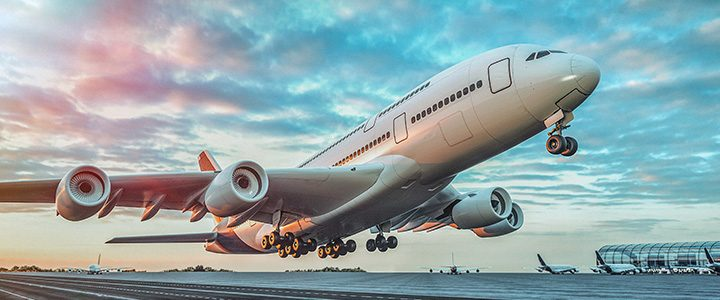

In [60]:
from IPython.display import Image
Image(filename="WWS-AirlinesAirports-720x300.jpg", width=900, height=200)

In [1]:
# Import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# import data

df = pd.read_excel('Data_Train.xlsx')

## Data_wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
#checking airlines names

df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [7]:
# checking for null values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# checking null record

df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
# checking null record

df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
#removing null values

df.dropna(inplace=True)

In [11]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


It seems that the Date_of_Journey consists of days months and years which can be extracted into three columns seperatley to inlcude it in the model after changing the column type from object to datetype.

In [12]:
#changing date of journey column type into datetime type to be able to extract day and month and year columns seperatley from it

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Date_of_Journey_day']=df['Date_of_Journey'].dt.day
df['Date_of_Journey_month']=df['Date_of_Journey'].dt.month
df['Date_of_Journey_year']=df['Date_of_Journey'].dt.year

In [13]:
#Dropping date of journey column after transformation

df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [14]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019


It seems that the Dep-time consists of hours and minutes which can be extracted into two columns seperatley to inlcude it in the model after changing the column type from object to datetype

In [15]:
#changing departure time column type into datetime type to be able to extract hour , minute columns seperatley from it.

df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['dep_hour']=df['Dep_Time'].dt.hour
df['dep_minute']=df['Dep_Time'].dt.minute

In [16]:
#Dropping Departure time column after transformation.

df.drop(['Dep_Time'],inplace=True,axis=1)

It seems that the Arr-time consists of hours,minutes,months which can be extracted into three columns seperatley to inlcude it in the model after changing the column type from object to datetype

In [17]:
#changing Arrival time column type into datetime type to be able to extract minute, hour ,month columns seperatley from it.

df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
df['Arr_hour']=df['Arrival_Time'].dt.hour
df['Arr_minute']=df['Arrival_Time'].dt.minute
df['Arr_month']=df['Arrival_Time'].dt.month

In [18]:
#Dropping Arrival time column after transformation.

df.drop(['Arrival_Time'],inplace=True,axis=1)

In [19]:
#checking final results after transformation.

df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,dep_hour,dep_minute,Arr_hour,Arr_minute,Arr_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,3


By looking at our categorical data, it seems that we have two kinds of cateorical data nominal categorical columns(Airline,Source,Destination) which means that they do not represent any order or rank in them and Total stops which is ordinal categorical data that represents rank in them.

I transform categorical columns into numerical data using one hot coding for nominal data and label encoding for ordinal data

Airlines column

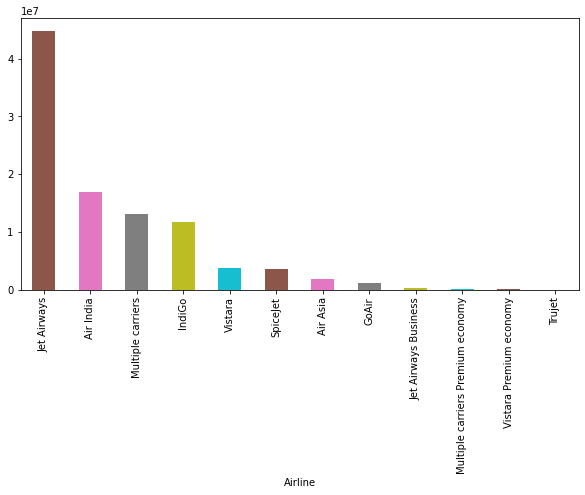

In [20]:
#Checking airlines relative to their prices

colors=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(10,5));
df.groupby(['Airline'])['Price'].sum().sort_values(ascending=False).plot.bar(color=colors);

I will convert the column using one hot coding scince it is a nominal column

In [21]:
#transforming Airline column from categorical into numerical using one hot coding

airline=df[['Airline']]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Source column

In [22]:
#Checking how many flights for each source

df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

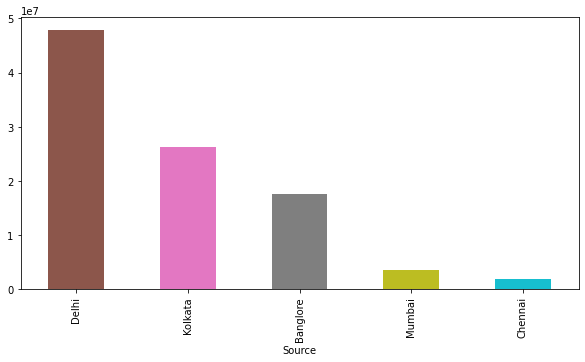

In [23]:
#Checking Source relative to their prices

plt.figure(figsize=(10,5));
df.groupby(['Source'])['Price'].sum().sort_values(ascending=False).plot.bar(color=colors);

In [24]:
#transforming source column from categorical into numerical using one hot coding

source=df[['Source']]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


Destinations column

In [25]:
#checking how many flights are going to available destinations in our dataset

df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

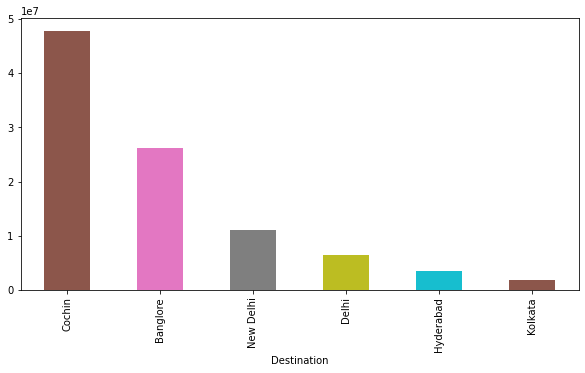

In [26]:
#checking destinations relative to their prices

plt.figure(figsize=(10,5));
df.groupby(['Destination'])['Price'].sum().sort_values(ascending=False).plot.bar(color=colors);

In [27]:
#transforming destination column from categorical into numerical using one hot coding

destination=df[['Destination']]
destination=pd.get_dummies(source,drop_first=True)
destination.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [28]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [29]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

Transforming ordinal column using label_encoder

In [30]:
#Checking how many flights for every stop

df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
#Transforming using label_encoder

from sklearn.preprocessing import LabelEncoder
df['Total_Stops']=LabelEncoder().fit_transform(df['Total_Stops'])

After finishing transformations will drop the categorical from the dataframe and concatenate the transformed columns into it

I will dropthe route and the duration columns from the dataframe since i will not include them into my model

In [32]:
#dropping columns

df.drop(['Route','Airline','Source','Destination','Duration','Additional_Info','Duration'],axis=1,inplace=True)

In [33]:
#Concatenating transformed airline source destination into the dataframe

df=pd.concat([airline,source,destination,df],axis=1)

In [34]:
#cheching final results

df.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,dep_hour,dep_minute,Arr_hour,Arr_minute,Arr_month,Duration_hours,Duration_mins
0,0,0,1,0,0,0,0,0,0,0,...,24,3,2019,22,20,1,10,3,2,50
1,1,0,0,0,0,0,0,0,0,0,...,5,1,2019,5,50,13,15,5,7,25
2,0,0,0,1,0,0,0,0,0,0,...,6,9,2019,9,25,4,25,6,19,0
3,0,0,1,0,0,0,0,0,0,0,...,5,12,2019,18,5,23,30,5,5,25
4,0,0,1,0,0,0,0,0,0,0,...,3,1,2019,16,50,21,35,5,4,45


### Model_building

In [35]:
df.shape

(10682, 31)

In [36]:
#selecting train independant features to include in my model

x=df.drop('Price',axis=1)

In [37]:
#selecting dependable variable i am trying to predict

y=df['Price']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [39]:
#fit the model on x_Train and y_Train variables

from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
# Trying to predict on the test data set

predictions=RF.predict(X_test)

In [41]:
predictions

array([16769.37 ,  6300.98 ,  8893.07 , ...,  6709.6  , 12717.115,
       13125.925])

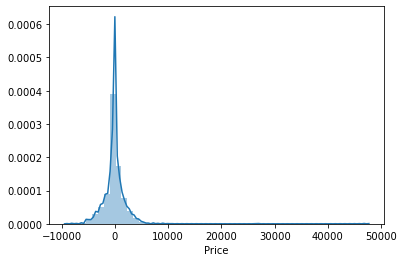

In [42]:
sns.distplot(y_test-predictions);

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1202.2597750292136
MSE: 4572073.046642938
RMSE: 2138.2406428283366


In [45]:
metrics.r2_score(y_test,predictions)

0.7879574666763294

## Conclusions

After transforming the data by removing nulls and changing the column types and transforming the categorical data columns using one hot coding and label encoder we included them into the Random forest regressor model whch gave us an MAE of 1194 and MSE of 453 and RMSE of 2130 and R2 79% which means that the model represents 79% percentage of the model variance.